In [4]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
data_folder = Path("./titanic")
test_path = data_folder / "test.csv"
train_path = data_folder / "train.csv"

In [6]:
data_original = pd.read_csv(train_path)

In [7]:
data_original.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C


In [9]:
data = data_original.drop(columns=data_original.columns.difference(["Age", "Fare"]))

In [10]:
data.isna().sum()

Age     177
Fare      0
dtype: int64

In [13]:
age_imputer = KNNImputer(n_neighbors=5)
data[data.columns] = age_imputer.fit_transform(data)

In [14]:
data.sample(5)

,Age,Fare
344,36.0,13.0000
71,16.0,46.9000
203,45.5,7.2250
435,14.0,120.0000
859,22.1,7.2292


Age
Fare


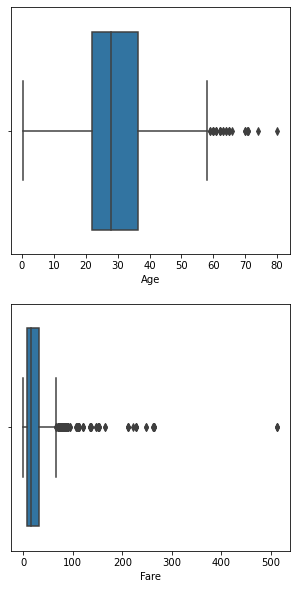

In [15]:
cols = [c for c in data.select_dtypes("number")]

fig, axis = plt.subplots(nrows=len(cols))
fig.set_size_inches(5, 10)

for col, ax in zip(cols, axis):
    print(col)
    sn.boxplot(data=data, x=col, ax=ax)

In [16]:
data = data.reindex(sorted(data.columns), axis=1)

In [17]:
data.describe()

,Age,Fare
count,891.000000,891.000000
mean,29.638278,32.204208
std,13.357812,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,36.400000,31.000000
max,80.000000,512.329200


In [18]:
scalers = {col: MinMaxScaler().fit(np.asarray(data[col]).reshape(-1, 1))
            for col in ["Age", "Fare"]}

In [19]:
for col, scaler in scalers.items():
    data[col] = scaler.transform(np.asarray(data[col]).reshape(-1, 1))

In [20]:
data.describe()

,Age,Fare
count,891.000000,891.000000
mean,0.367156,0.062858
std,0.167854,0.096995
min,0.000000,0.000000
25%,0.271174,0.015440
50%,0.346569,0.028213
75%,0.452124,0.060508
max,1.000000,1.000000


In [21]:
data.sample(5)

,Age,Fare
430,0.346569,0.051822
469,0.004147,0.037590
144,0.220910,0.022447
696,0.547625,0.015713
215,0.384267,0.221098


In [22]:
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, DBSCAN, AgglomerativeClustering

In [23]:
def show_cluster(cluster, df):
    df["class"] = cluster.fit_predict(df)

    sn.scatterplot(data=df, hue="class", x="Age", y="Fare")
    plt.show()

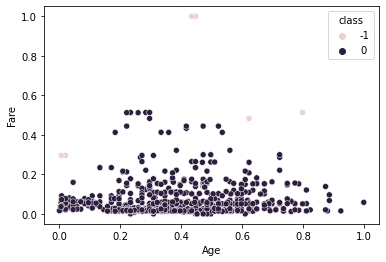

In [24]:
model = DBSCAN(eps=0.1)
show_cluster(model, data)

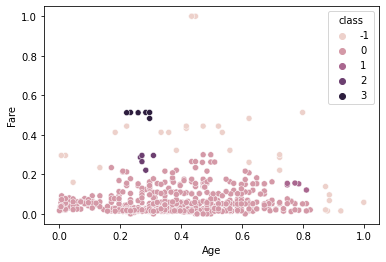

In [26]:
model = DBSCAN(eps=0.05)
show_cluster(model, data)

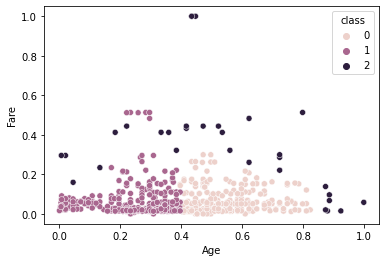

In [28]:
model2 = KMeans(n_clusters=3, random_state=15)
show_cluster(model2, data)

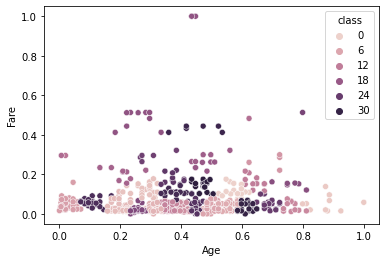

In [33]:
model3 = AffinityPropagation(damping=0.9, random_state=15)
show_cluster(model3, data)

AffinityPropagation не сходиться на нижчих значеннях damping. 

Це означає, що алгоритм не може об'єднати деякі кластери в один і необхідно змінити підхід

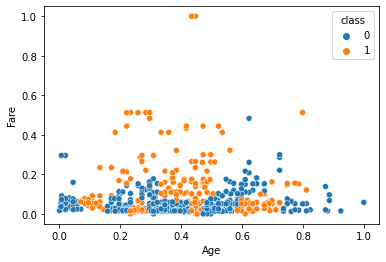

In [34]:
model4 = MeanShift()
show_cluster(model4, data)

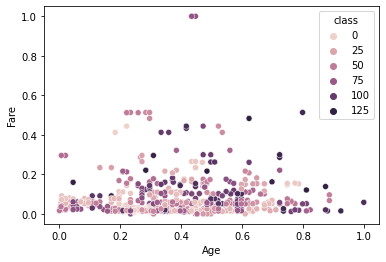

In [38]:
model5 = AgglomerativeClustering(n_clusters=None, compute_full_tree=True, distance_threshold=0.1)
show_cluster(model5, data)

З усіх досліджених алгоритмів, DBSCAN показав найкращі результати. 

він знайшов аутлаерів і 4 кластери, 3 з яких були дуже маленькими